In [1]:
import magritte.core as magritte             # Core functionality
import magritte.plot as plot
import numpy as np
import os
import yt
import matplotlib.pyplot as plt
import matplotlib

from astropy import units

matplotlib.rc('font', family='serif')

from scipy.spatial import Delaunay, cKDTree   # Finding neighbors

Define file locations for importing all computed models (you will need to change the working directory) 

In [2]:
wdir = "/lhome/thomasc/Magritte-examples/Magritte3paper/Phantom_3D/"
J_file_original = os.path.join(wdir, 'J_original_full_NLTE.npy')
J_file_haar = os.path.join(wdir, 'J_haar_full_NLTE.npy')
J_file_gmsh = os.path.join(wdir, 'J_gmsh_full_NLTE.npy')
J_file_rec = os.path.join(wdir, 'J_rec_full_NLTE.npy')
model_file_haar = os.path.join(wdir, 'wind_red_haar.hdf5')   # reduced 3D Phantom Magritte model
model_file_gmsh = os.path.join(wdir, 'wind_red_gmsh.hdf5')   # reduced 3D Phantom Magritte model
model_file_rec = os.path.join(wdir, 'wind_red_rec.hdf5')   # reduced 3D Phantom Magritte model
model_file_original = os.path.join(wdir, 'model_Phantom_3D.hdf5')   # original 3D Phantom Magritte model

#model files with a single NLTE iteration
model_file_gmsh_save = os.path.join(wdir, 'wind_red_gmsh_save.hdf5')   # reduced 3D Phantom Magritte model
model_file_rec_save = os.path.join(wdir, 'wind_red_rec_save.hdf5')   # reduced 3D Phantom Magritte model
model_file_original_save = os.path.join(wdir, 'model_Phantom_3D_save.hdf5')   # original 3D Phantom Magritte model

In [3]:
#test whether the NLTE models are saved correctly
NLTE_model_gmsh = magritte.Model(model_file_gmsh_save)
NLTE_model_rec = magritte.Model(model_file_rec_save)
NLTE_model_original = magritte.Model(model_file_original_save)



                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = /lhome/thomasc/Magritte-examples/Magritte3paper/Phantom_3D/wind_red_gmsh_save.hdf5
-------------------------------------------
Reading parameters...
Reading points...
Reading rays...
Reading boundary...
Reading chemistry...
Reading species...
Reading thermodynamics...
Reading temperature...
Reading turbulence...
Reading lines...
Reading lineProducingSpecies...
Reading linedata...
read num 1
read sym CO
nlev = 41
nrad = 1
Reading collisionPartner...
Reading collisionPartner...
Reading quadrature...
Reading radiation...
Reading frequencies...
Not using scattering!
                                           
-------------------------------------------
  Model read, parameters:                  
-------------------------------------------
  npoints    = 91960
  nrays      = 108
  nboundary  = 4792
  nfr

In [4]:
#common parameters for creating images from the different models
fcen = NLTE_model_original.lines.lineProducingSpecies[0].linedata.frequency[0]
vpix = 1500   # velocity pixel size [m/s]
dd   = vpix * (NLTE_model_original.parameters.nfreqs()-1)/2 / magritte.CC
fmin = fcen - fcen*dd
fmax = fcen + fcen*dd

NLTE_model_gmsh.compute_spectral_discretisation ()
NLTE_model_gmsh.compute_inverse_line_widths     ()
#the codebase currently does not save line opacities and emissivities, so I do need to call this manually
NLTE_model_gmsh.lines.set_emissivity_and_opacity()

NLTE_model_rec.compute_spectral_discretisation ()
NLTE_model_rec.compute_inverse_line_widths     ()
NLTE_model_rec.lines.set_emissivity_and_opacity()

NLTE_model_original.compute_spectral_discretisation ()
NLTE_model_original.compute_inverse_line_widths     ()
NLTE_model_original.lines.set_emissivity_and_opacity()

Computing spectral discretisation...
Computing inverse line widths...
Computing spectral discretisation...
Computing inverse line widths...
Computing spectral discretisation...
Computing inverse line widths...


In [5]:
NLTE_model_gmsh.compute_spectral_discretisation (fmin, fmax, 31)#bins using the specified amount of frequency bins (31). Can be any integer >=1
# NLTE_model_gmsh.compute_image_new               (NLTE_model_gmsh.parameters.hnrays()-1, 512, 512)#using a resolution of 512x512 for the image.
NLTE_model_gmsh.compute_image_new               (0.0,0.0,1.0, 512, 512)#using a resolution of 512x512 for the image.

NLTE_model_rec.compute_spectral_discretisation (fmin, fmax, 31)#bins using the specified amount of frequency bins (31). Can be any integer >=1
# NLTE_model_rec.compute_image_new               (NLTE_model_rec.parameters.hnrays()-1, 512, 512)#using a resolution of 512x512 for the image.
NLTE_model_rec.compute_image_new               (0.0,0.0,1.0, 512, 512)#using a resolution of 512x512 for the image.

NLTE_model_original.compute_spectral_discretisation (fmin, fmax, 31)#bins using the specified amount of frequency bins (31). Can be any integer >=1
# NLTE_model_original.compute_image_new               (NLTE_model_original.parameters.hnrays()-1, 512, 512)#using a resolution of 512x512 for the image.
NLTE_model_original.compute_image_new               (0.0,0.0,1.0, 512, 512)#using a resolution of 512x512 for the image.


Computing spectral discretisation...
Computing image new...
Computing spectral discretisation...
Computing image new...
Computing spectral discretisation...
Computing image new...


0

In [6]:
#plot image of gmsh model
widget_gmsh = plot.image_mpl(
    NLTE_model_gmsh,
    image_nr =  -1,
    zoom     = 1.8,
    npix_x   = 240,
    npix_y   = 240,
    x_unit   = units.au,
    v_unit   = units.km / units.s,
    method = 'nearest'
)

100%|███████████████████████████████████████████| 31/31 [00:20<00:00,  1.53it/s]


interactive(children=(IntSlider(value=15, description='v', max=30), Output()), _dom_classes=('widget-interact'…

In [7]:
# plot the channel maps of the gmsh re-mesh and save them in the "Images" subfolder
for index in range(31):
    fig = widget_gmsh.widget.f(index)
    fig.savefig("Images/gmsh_channel_map_"+str(index)+".png")

In [8]:
#plot recursive model
widget_rec = plot.image_mpl(
    NLTE_model_rec,
    image_nr =  -1,
    zoom     = 1.8,
    npix_x   = 240,
    npix_y   = 240,
    x_unit   = units.au,
    v_unit   = units.km / units.s,
    method = 'nearest'
)

100%|███████████████████████████████████████████| 31/31 [00:19<00:00,  1.63it/s]


interactive(children=(IntSlider(value=15, description='v', max=30), Output()), _dom_classes=('widget-interact'…

In [9]:
# plot the channel maps of the recursive re-mesh and save them in the "Images" subfolder
for index in range(31):
    fig = widget_rec.widget.f(index)
    fig.savefig("Images/rec_channel_map_"+str(index)+".png")

In [10]:
#plot original model
widget_original = plot.image_mpl(
    NLTE_model_original,
    image_nr =  -1,
    zoom     = 1.8,
    npix_x   = 240,
    npix_y   = 240,
    x_unit   = units.au,
    v_unit   = units.km / units.s,
    method = 'nearest'
)

100%|███████████████████████████████████████████| 31/31 [00:19<00:00,  1.58it/s]


interactive(children=(IntSlider(value=15, description='v', max=30), Output()), _dom_classes=('widget-interact'…

In [11]:
# plot the channel maps of the original mesh and save them in the "Images" subfolder
for index in range(31):
    fig = widget_original.widget.f(index)
    fig.savefig("Images/original_channel_map_"+str(index)+".png")

Loading the different saved J's for comparing them

In [12]:
J_haar = np.load(J_file_haar)[:,0]
J_gmsh = np.load(J_file_gmsh)[:,0]
J_rec = np.load(J_file_rec)[:,0]
J_original = np.load(J_file_original)[:,0]

Load all models again in order to obtain the corresponding grids.

In [13]:
model_haar = magritte.Model(model_file_haar)
model_gmsh = magritte.Model(model_file_gmsh)
model_rec = magritte.Model(model_file_rec)
model_original = magritte.Model(model_file_original)

                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = /lhome/thomasc/Magritte-examples/Magritte3paper/Phantom_3D/wind_red_haar.hdf5
-------------------------------------------
Reading parameters...
Reading points...
Reading rays...
Reading boundary...
Reading chemistry...
Reading species...
Reading thermodynamics...
Reading temperature...
Reading turbulence...
Reading lines...
Reading lineProducingSpecies...
Reading linedata...
read num 1
read sym CO
nlev = 41
nrad = 1
Reading collisionPartner...
Reading collisionPartner...
Reading quadrature...
Reading radiation...
Reading frequencies...
Not using scattering!
                                           
-------------------------------------------
  Model read, parameters:                  
-------------------------------------------
  npoints    = 88615
  nrays      = 108
  nboundary  = 985
  nfreqs   

Obtain delaunay triangulations for showing the neighors structure (might take a few minutes for the original grid).

In [14]:
position_haar = np.array(model_haar.geometry.points.position)
position_gmsh = np.array(model_gmsh.geometry.points.position)
position_rec = np.array(model_rec.geometry.points.position)
position_original = np.array(model_original.geometry.points.position)
delaunay_haar = Delaunay(position_haar)
delaunay_gmsh = Delaunay(position_gmsh)
delaunay_rec = Delaunay(position_rec)
delaunay_original = Delaunay(position_original)

Plot all computed J's

In [15]:
ds_haar = yt.load_unstructured_mesh(
    connectivity = delaunay_haar.simplices.astype(np.int64),
    coordinates  = delaunay_haar.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_haar[delaunay_haar.simplices].astype(np.float64)}
)

yt : [INFO     ] 2023-09-29 13:43:21,188 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:21,188 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:21,189 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-09-29 13:43:21,189 Parameters: domain_right_edge         = [3.22233049e+15 3.28144691e+15 3.28662933e+15]
yt : [INFO     ] 2023-09-29 13:43:21,189 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2023-09-29 13:43:21,262 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-09-29 13:43:21,262 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-09-29 13:43:21,263 xlim = -3345078952989753.000000 3222330488101019.000000
yt : [INFO     ] 2023-09-29 13:43:21,263 ylim = -3284942722075706.000000 3281446906160748.000000
yt : [INFO     ] 2023-09-29 13:43:21,266 Making a fixed resolution buffer of (('connect1', 'J')) 800 by 800



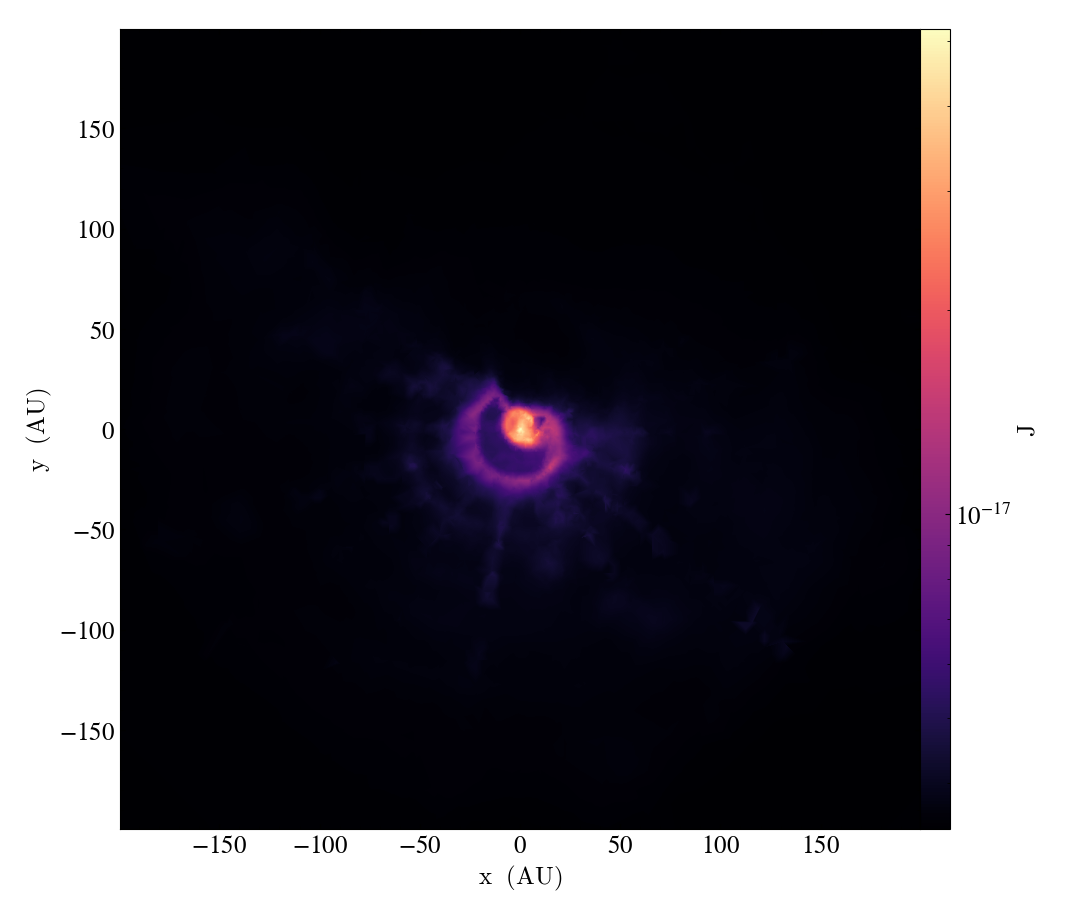

In [16]:
sl = yt.SlicePlot (ds_haar, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
sl.zoom           (1.1)

yt : [INFO     ] 2023-09-29 13:43:22,157 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:22,158 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:22,159 Parameters: domain_left_edge          = [-3.11073526e+15 -3.11073526e+15 -3.11073526e+15]
yt : [INFO     ] 2023-09-29 13:43:22,159 Parameters: domain_right_edge         = [3.11073526e+15 3.11073526e+15 3.11073526e+15]
yt : [INFO     ] 2023-09-29 13:43:22,160 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:22,222 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-09-29 13:43:22,222 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-09-29 13:43:22,223 xlim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-09-29 13:43:22,223 ylim = -3110735261412304.000000 3110735261412304.000000
yt : [INFO     ] 2023-09-29 13:43:22,225 Making a fixed resolution buffer of (('connect1', 'J'))


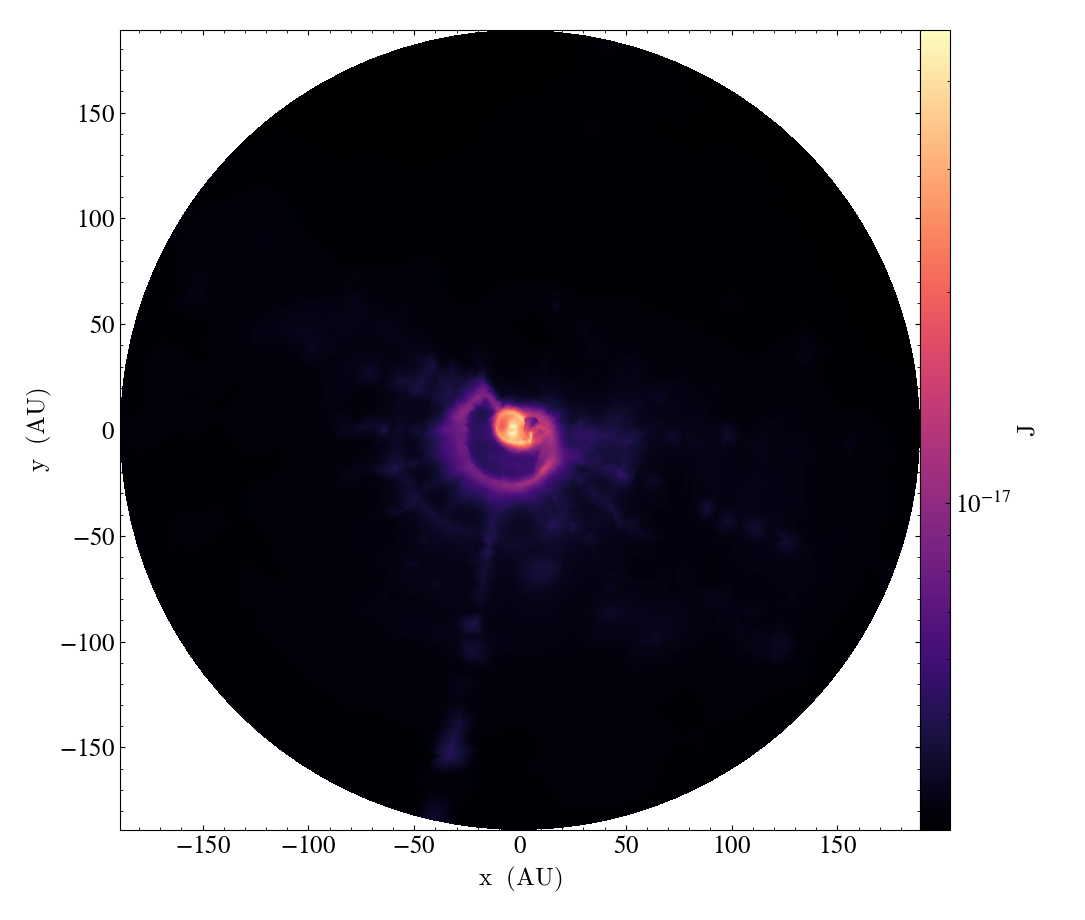

In [17]:
ds_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_gmsh.simplices.astype(np.int64),
    coordinates  = delaunay_gmsh.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_gmsh[delaunay_gmsh.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_gmsh, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
sl.zoom           (1.1)

yt : [INFO     ] 2023-09-29 13:43:22,931 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:22,931 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:22,932 Parameters: domain_left_edge          = [-3.35164636e+15 -3.29150911e+15 -3.29102752e+15]
yt : [INFO     ] 2023-09-29 13:43:22,932 Parameters: domain_right_edge         = [3.22889148e+15 3.28800688e+15 3.29319400e+15]
yt : [INFO     ] 2023-09-29 13:43:22,932 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:22,990 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-09-29 13:43:22,990 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-09-29 13:43:22,990 xlim = -3351646356017365.000000 3228891477649111.000000
yt : [INFO     ] 2023-09-29 13:43:22,991 ylim = -3291509105291458.500000 3288006876892891.500000
yt : [INFO     ] 2023-09-29 13:43:22,992 Making a fixed resolution buffer of (('connect1', 'J'))


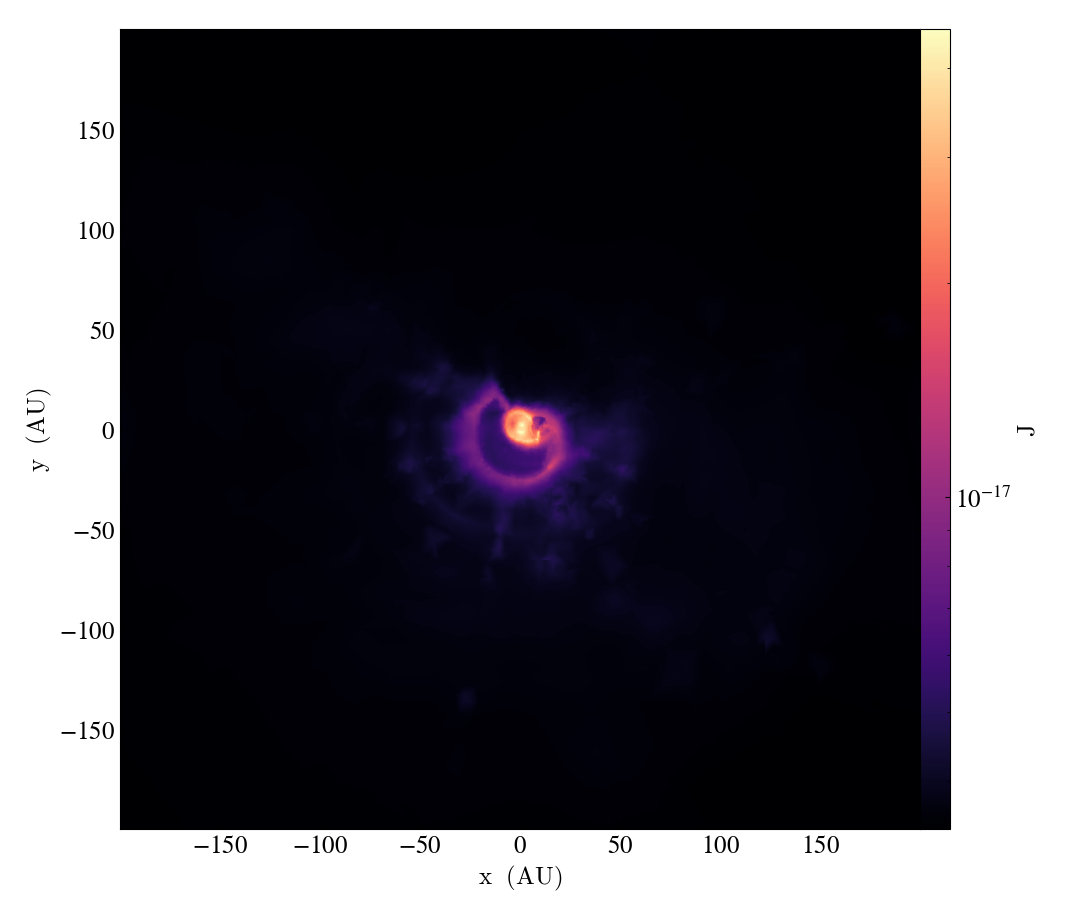

In [18]:
ds_rec = yt.load_unstructured_mesh(
    connectivity = delaunay_rec.simplices.astype(np.int64),
    coordinates  = delaunay_rec.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_rec[delaunay_rec.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_rec, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
sl.zoom           (1.1)

yt : [INFO     ] 2023-09-29 13:43:23,810 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:23,811 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:23,812 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-09-29 13:43:23,812 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-09-29 13:43:23,812 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:24,121 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:24,121 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:24,122 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:24,122 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:24,123 Making a fixed resolution buffer of (('connect1', 'J'))


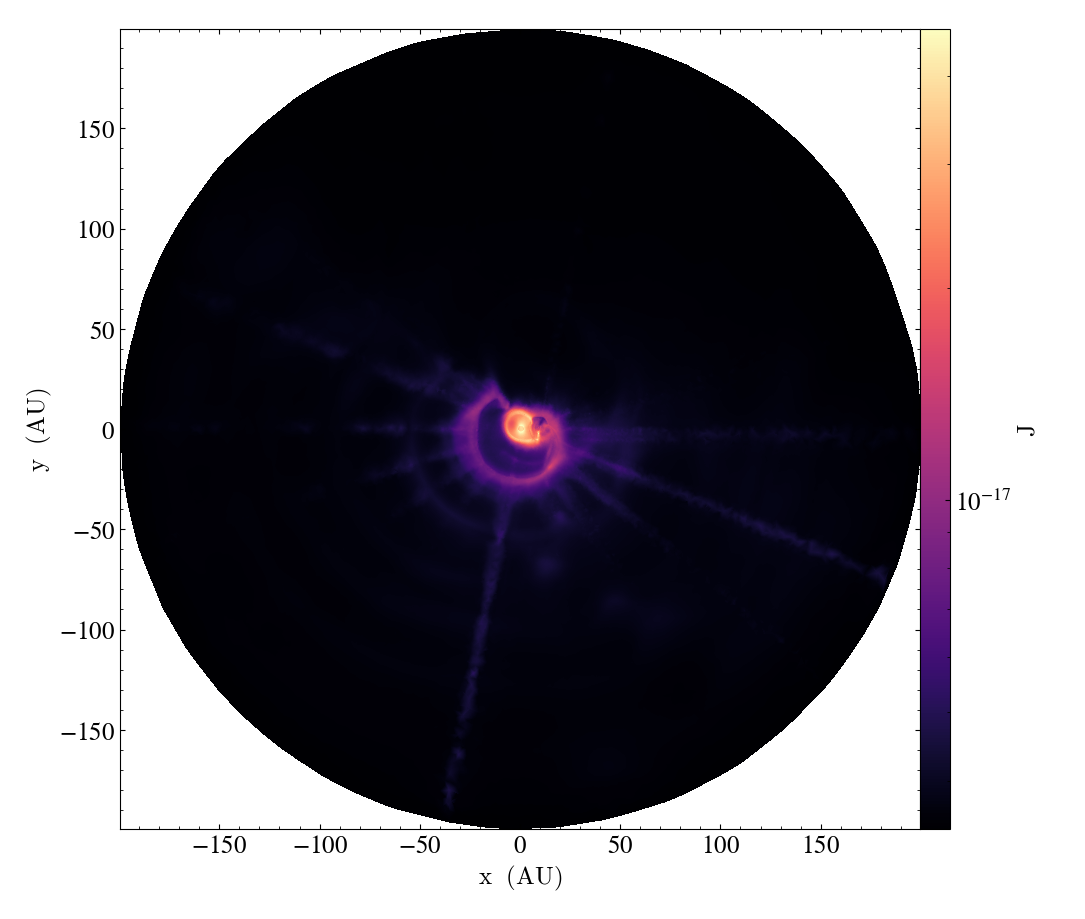

In [19]:
ds_original = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J'): J_original[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (ds_original, 'z', ('connect1','J'))
sl.set_cmap       (('connect1', 'J'), 'magma')
sl.zoom           (1.1)

Project reduced computed data onto original data

In order to properly compare the computed mean intensities J on the different grids, we need to interpolate these results onto the original grid.

In [20]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
#nearest neighbor interpolation, as the linear does not seem to work for the haar mesh...
interp_func_J_gmsh = NearestNDInterpolator (position_gmsh, J_gmsh)
interp_func_J_haar = NearestNDInterpolator (position_haar, J_haar)
interp_func_J_rec = NearestNDInterpolator (position_rec, J_rec)

In [21]:
prj_J_haar_original = interp_func_J_haar(position_original)

In [22]:
prj_J_gmsh_original = interp_func_J_gmsh(position_original)

In [23]:
prj_J_rec_original = interp_func_J_rec(position_original)

After interpolating, compute the relative difference when compared to the original mesh

In [24]:
reldiff_gmsh_original_grid = 1.0/2.0*np.abs(prj_J_gmsh_original-J_original)/(prj_J_gmsh_original+J_original)
reldiff_haar_original_grid = 1.0/2.0*np.abs(prj_J_haar_original-J_original)/(prj_J_haar_original+J_original)
reldiff_rec_original_grid = 1.0/2.0*np.abs(prj_J_rec_original-J_original)/(prj_J_rec_original+J_original)

yt : [INFO     ] 2023-09-29 13:43:28,992 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:28,992 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:28,993 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-09-29 13:43:28,993 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-09-29 13:43:28,993 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:29,309 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:29,310 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:29,310 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:29,311 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:29,312 Making a fixed resolution buffer of (('connect1', 'J_re


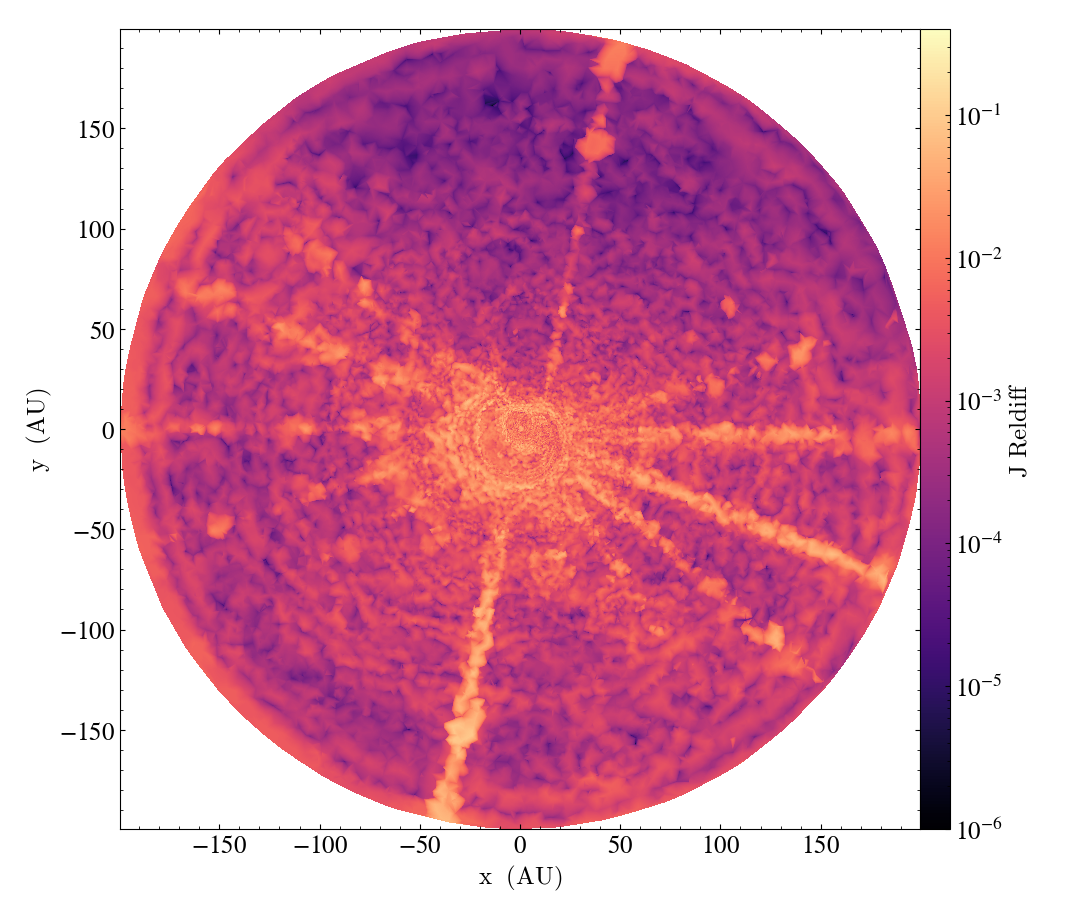

In [25]:
#Relative difference with gmsh re-mesh
reldiff_original_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_gmsh_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_gmsh, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-09-29 13:43:31,761 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:31,761 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:31,761 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-09-29 13:43:31,762 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-09-29 13:43:31,762 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:32,080 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:32,081 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:32,081 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:32,081 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:32,082 Making a fixed resolution buffer of (('connect1', 'J_re


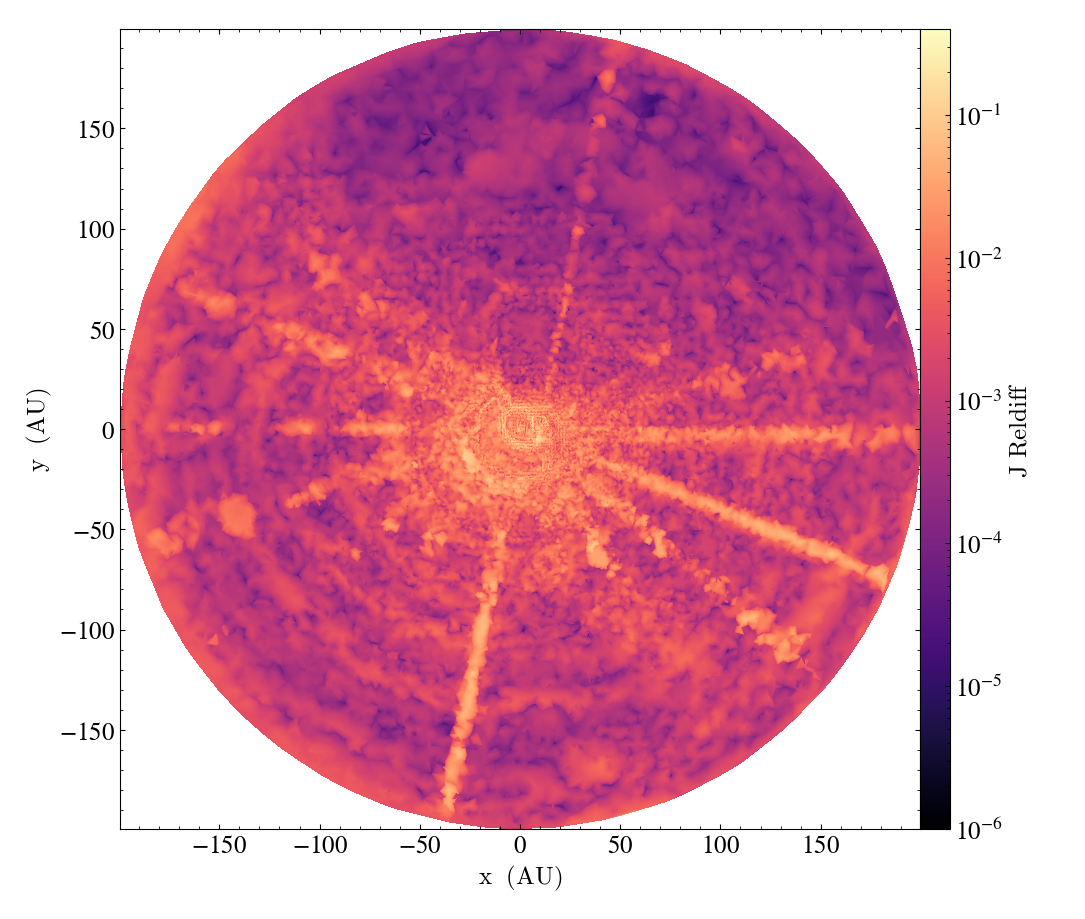

In [26]:
#Relative difference with haar re-mesh
reldiff_original_gmsh = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_haar_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_gmsh, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

yt : [INFO     ] 2023-09-29 13:43:35,316 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-29 13:43:35,316 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-09-29 13:43:35,316 Parameters: domain_left_edge          = [-3.34507895e+15 -3.28494272e+15 -3.28445644e+15]
yt : [INFO     ] 2023-09-29 13:43:35,317 Parameters: domain_right_edge         = [3.22232407e+15 3.28144049e+15 3.28662292e+15]
yt : [INFO     ] 2023-09-29 13:43:35,317 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 13:43:35,654 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:35,655 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:35,655 xlim = -3345078952989754.000000 3222324074621500.000000
yt : [INFO     ] 2023-09-29 13:43:35,655 ylim = -3284942722075706.000000 3281440493677138.000000
yt : [INFO     ] 2023-09-29 13:43:35,656 Making a fixed resolution buffer of (('connect1', 'J_re


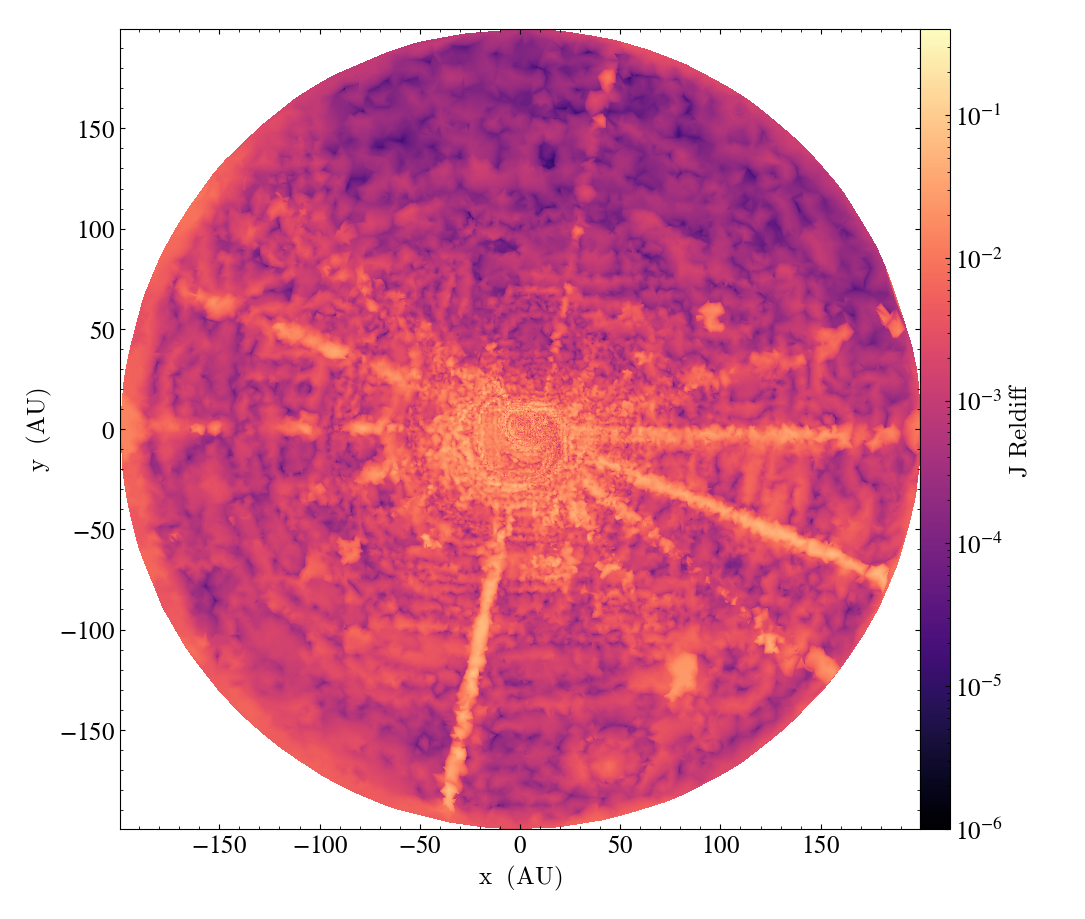

In [27]:
#Relative difference with recursive re-mesh
reldiff_original_rec = yt.load_unstructured_mesh(
    connectivity = delaunay_original.simplices.astype(np.int64),
    coordinates  = delaunay_original.points.astype(np.float64) * 100.0, # yt expects cm not m 
    node_data    = {('connect1', 'J_reldiff'): reldiff_rec_original_grid[delaunay_original.simplices].astype(np.float64)}
)
sl = yt.SlicePlot (reldiff_original_rec, 'z', ('connect1','J_reldiff'))
sl.set_cmap       (('connect1', 'J_reldiff'), 'magma')
sl.set_zlim(('connect1', 'J_reldiff'), zmin=(1e-6, "1"), zmax=(4e-1, "1"))
sl.zoom           (1.1)

NameError: name 'rel_diff_gmsh' is not defined

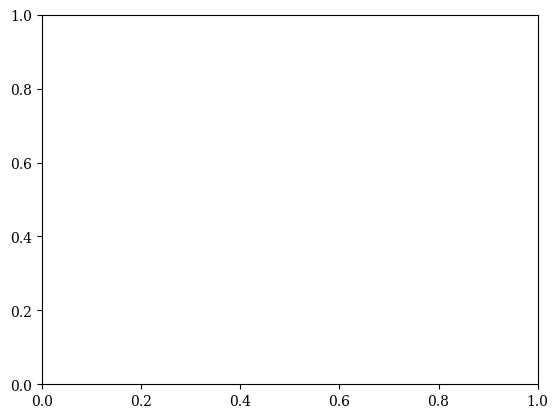

In [28]:
#Cumulative distribution of the relative differences of the computed J's
from matplotlib.lines import Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(reldiff_gmsh_original_grid, cumulative=True, label='GMSH', density=True,
         bins = len(rel_diff_gmsh), histtype='step', alpha=0.8)
plt.hist(reldiff_rec_original_grid, cumulative=True, label='Recursive', density=True,
         bins = len(rel_diff_rec), histtype='step', alpha=0.8)
plt.xscale('log')
plt.xlim(1e-6,2e-1)
plt.xlabel("Relative difference")
plt.ylabel("Cumulative distribution function")
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, loc = "upper left")
plt.savefig("relative_difference_plot.pdf")

In [ ]:
#to find out which percentage of pixels are computed better than the given maximum relative error
print((reldiff_gmsh_original_grid.flatten() < 0.02).sum()/len(reldiff_gmsh_original_grid.flatten()))
print((reldiff_rec_original_grid.flatten() < 0.02).sum()/len(reldiff_rec_original_grid.flatten()))

In [ ]:
I_gmsh = np.array(NLTE_model_gmsh.images[-1].I)
I_original = np.array(NLTE_model_original.images[-1].I)
I_rec = np.array(NLTE_model_rec.images[-1].I)

We will also compare the obtained images for the different meshes

In [ ]:
from astropy.constants import au
Nx = 512 #TODO: get automatically from image
Ny = 512
posx = NLTE_model_original.images[-1].ImX
posy = NLTE_model_original.images[-1].ImY
plt.imshow(I_original.reshape(Nx, Ny, 31)[:,:,14].T, extent=[min(posx), max(posx), min(posy), max(posy)]/au.value, norm=matplotlib.colors.LogNorm())
plt.gca().invert_yaxis()

In [ ]:
reldiff_image_original_rec = 2.0 * (np.abs(I_rec-I_original))/(I_rec+I_original)
reldiff_image_original_gmsh = 2.0 * (np.abs(I_gmsh-I_original))/(I_gmsh+I_original)

In [ ]:
#Cumulative distribution of the relative differences of the intensities in the obtained images, per pixel, per frequency/channel map
plt.figure()
plt.xlim(1e-4,2e-1)
plt.hist(reldiff_image_original_gmsh.flatten(), cumulative=True, label='GMSH', density=True,
         bins = len(reldiff_image_original_gmsh), histtype='step', alpha=0.8) 
plt.gca().set_xscale('log')

plt.hist(reldiff_image_original_rec.flatten(), cumulative=True, label='Recursive', density=True,
         bins = len(reldiff_image_original_rec), histtype='step', alpha=0.8)
plt.legend()
plt.xlabel("Relative difference")
plt.ylabel("Cumulative distribution function")
plt.savefig("relative_difference_image.pdf")
plt.show()

In [ ]:
#to find out which percentage of pixels are computed better than the given maximum relative error
print((reldiff_image_original_gmsh.flatten() < 0.02).sum()/len(reldiff_image_original_gmsh.flatten()))
print((reldiff_image_original_rec.flatten() < 0.02).sum()/len(reldiff_image_original_rec.flatten()))

In [ ]:
#Plot the relative differences for middle channel map
posx, posy = NLTE_model_original.images[-1].ImX, NLTE_model_original.images[-1].ImY
print(np.array(NLTE_model_original.images[-1].image_direction_x))
print(np.array(NLTE_model_original.images[-1].image_direction_y))
zoom = 1.8
#set bounds for colorbar
maxval = max(np.max(reldiff_image_original_rec), np.max(reldiff_image_original_gmsh))
minval = 1e-4#lower than this value would be exaggerated

from astropy.constants import au

plt.figure()
plt.imshow(reldiff_image_original_rec.reshape(Nx, Ny, 31)[:,:,14].T, extent=[min(posx), max(posx), min(posy), max(posy)]/au.value, norm=matplotlib.colors.LogNorm())
plt.colorbar()#err, limit colorbar to 10^-4; there is absolutely no point in going lower
plt.gca().invert_yaxis()#y axis should be flipped to correspond with the images
#zoom in 
minx, maxx = plt.gca().get_xlim()
miny, maxy = plt.gca().get_ylim()
midx, diffx = (minx+maxx)/2, (maxx-minx)/2
midy, diffy = (miny+maxy)/2, (maxy-miny)/2

ax = plt.gca()
ax.set_xlim([midx-diffx/zoom, midx+diffx/zoom])
ax.set_ylim([midy-diffy/zoom, midy+diffy/zoom])

plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.clim(minval, maxval)

plt.savefig("reldiff_image_original_rec.pdf")
plt.show()

plt.figure()
plt.imshow(reldiff_image_original_gmsh.reshape(Nx, Ny, 31)[:,:,14].T, extent=[min(posx), max(posx), min(posy), max(posy)]/au.value, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.gca().invert_yaxis()#y axis is wrong
#same zoom settings
ax = plt.gca()
ax.set_xlim([midx-diffx/zoom, midx+diffx/zoom])
ax.set_ylim([midy-diffy/zoom, midy+diffy/zoom])
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.clim(minval, maxval)

plt.savefig("reldiff_image_original_gmsh.pdf")
plt.show()

In [ ]:
#and do the same for all channel maps
for index in range(31):
    posx, posy = NLTE_model_original.images[-1].ImX, NLTE_model_original.images[-1].ImY
    zoom = 1.8
    #set bounds for colorbar
    maxval = max(np.max(reldiff_image_original_rec), np.max(reldiff_image_original_gmsh))
    minval = 1e-4#lower than this value would be exaggerated

    plt.figure()
    plt.imshow(reldiff_image_original_rec.reshape(Nx, Ny, 31)[:,:,index].T, extent=[min(posx), max(posx), min(posy), max(posy)]/au.value, norm=matplotlib.colors.LogNorm())
    plt.colorbar()#err, limit colorbar to 10^-4; there is absolutely no point in going lower
    plt.gca().invert_yaxis()#y axis is wrong
    #zoom in 
    minx, maxx = plt.gca().get_xlim()
    miny, maxy = plt.gca().get_ylim()
    midx, diffx = (minx+maxx)/2, (maxx-minx)/2
    midy, diffy = (miny+maxy)/2, (maxy-miny)/2

    ax = plt.gca()
    ax.set_xlim([midx-diffx/zoom, midx+diffx/zoom])
    ax.set_ylim([midy-diffy/zoom, midy+diffy/zoom])

    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    plt.clim(minval, maxval)

    plt.savefig("Images/reldiff_image_original_rec_"+str(index)+".pdf")

    plt.figure()
    plt.imshow(reldiff_image_original_gmsh.reshape(Nx, Ny, 31)[:,:,index].T, extent=[min(posx), max(posx), min(posy), max(posy)]/au.value, norm=matplotlib.colors.LogNorm())
    plt.colorbar()#err, limit colorbar to 10^-4; there is absolutely no point in going lower
    plt.gca().invert_yaxis()#y axis is wrong
    #same zoom settings
    ax = plt.gca()
    ax.set_xlim([midx-diffx/zoom, midx+diffx/zoom])
    ax.set_ylim([midy-diffy/zoom, midy+diffy/zoom])
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    plt.clim(minval, maxval)

    plt.savefig("Images/reldiff_image_original_gmsh_"+str(index)+".pdf")
